In [8]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
sns.set_style('whitegrid')

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
data.data.shape

(569, 30)

In [12]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
data.target.shape

(569,)

In [15]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=0)

In [45]:
N, D = X_train.shape

In [46]:
# Scale the data
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Time to PyTorch
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [50]:
# Loss and Optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [51]:
# Convert data into Torch Tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [52]:
# TRAIN THE MODEL
n_epochs = 1000

In [53]:
# Stuff to store

In [54]:
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

In [55]:
for i in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize
    loss.backward()
    optimizer.step()
    
    # GET TEST LOSS
    output_test = model(X_test)
    loss_test = criterion(output_test, y_test)
    
    # save
    train_losses[i] = loss.item()
    test_losses[i] = loss_test.item()
    
    if (i+1) % 50 == 0:
        print(f'Epoch {i+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.5395, Test Loss: 0.5362
Epoch 100/1000, Train Loss: 0.3976, Test Loss: 0.4088
Epoch 150/1000, Train Loss: 0.3171, Test Loss: 0.3360
Epoch 200/1000, Train Loss: 0.2653, Test Loss: 0.2878
Epoch 250/1000, Train Loss: 0.2293, Test Loss: 0.2533
Epoch 300/1000, Train Loss: 0.2033, Test Loss: 0.2276
Epoch 350/1000, Train Loss: 0.1839, Test Loss: 0.2079
Epoch 400/1000, Train Loss: 0.1689, Test Loss: 0.1924
Epoch 450/1000, Train Loss: 0.1571, Test Loss: 0.1800
Epoch 500/1000, Train Loss: 0.1475, Test Loss: 0.1697
Epoch 550/1000, Train Loss: 0.1396, Test Loss: 0.1612
Epoch 600/1000, Train Loss: 0.1329, Test Loss: 0.1539
Epoch 650/1000, Train Loss: 0.1272, Test Loss: 0.1475
Epoch 700/1000, Train Loss: 0.1222, Test Loss: 0.1420
Epoch 750/1000, Train Loss: 0.1179, Test Loss: 0.1371
Epoch 800/1000, Train Loss: 0.1141, Test Loss: 0.1328
Epoch 850/1000, Train Loss: 0.1107, Test Loss: 0.1289
Epoch 900/1000, Train Loss: 0.1077, Test Loss: 0.1254
Epoch 950/1000, Train Loss: 0

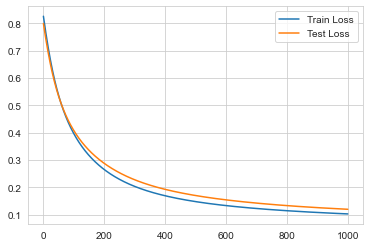

In [56]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()

In [57]:
# Checkick accuracy
with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train) * 100.0
    
    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test) * 100.0
print(f'Training accuracy: {train_acc:.4f}%, Test accuracy: {test_acc:.4f}%')

Training accuracy: 97.6378%, Test accuracy: 96.8085%


In [92]:
# SAVING AND LOADING MODEL

In [93]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5084, -0.4194, -0.3313, -0.3580, -0.1987, -0.1414, -0.5275, -0.4046,
                       -0.4200,  0.5131, -0.3676, -0.1949, -0.4579, -0.5550,  0.2107,  0.2869,
                        0.0146, -0.1794,  0.1005,  0.6510, -0.3134, -0.4285, -0.4982, -0.3283,
                       -0.3614, -0.4114, -0.5168, -0.3190, -0.2564, -0.3508]])),
             ('0.bias', tensor([0.3593]))])

In [94]:
# save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [95]:
# Checking model by loading it
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [96]:
model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [97]:
# Evaluate the model
# Results should be the same
# Checkick accuracy
with torch.no_grad():
    p_train = model2(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train) * 100.0
    
    p_test = model2(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test) * 100.0
print(f'Training accuracy: {train_acc:.4f}%, Test accuracy: {test_acc:.4f}%')

Training accuracy: 98.4252%, Test accuracy: 96.8085%


In [ ]:
# Doing the the same in Google Colab
from google.colab import files
files.download('mymodel.pt')